# **2. Miles Per Gallon**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg')
df.dropna(inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## *1. Déterminez quelles sont les variables Discrètes et Continues du dataset.*

   - Les variables **discrètes** sont les suivantes :
      - cylinders
      - model_year
      - origin
      - name

   - Les variables **continues** sont les suivantes :
      - mpg
      - displacement
      - horsepower
      - weight
      - acceleration

## *2. Analyser la variable "mpg"*

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

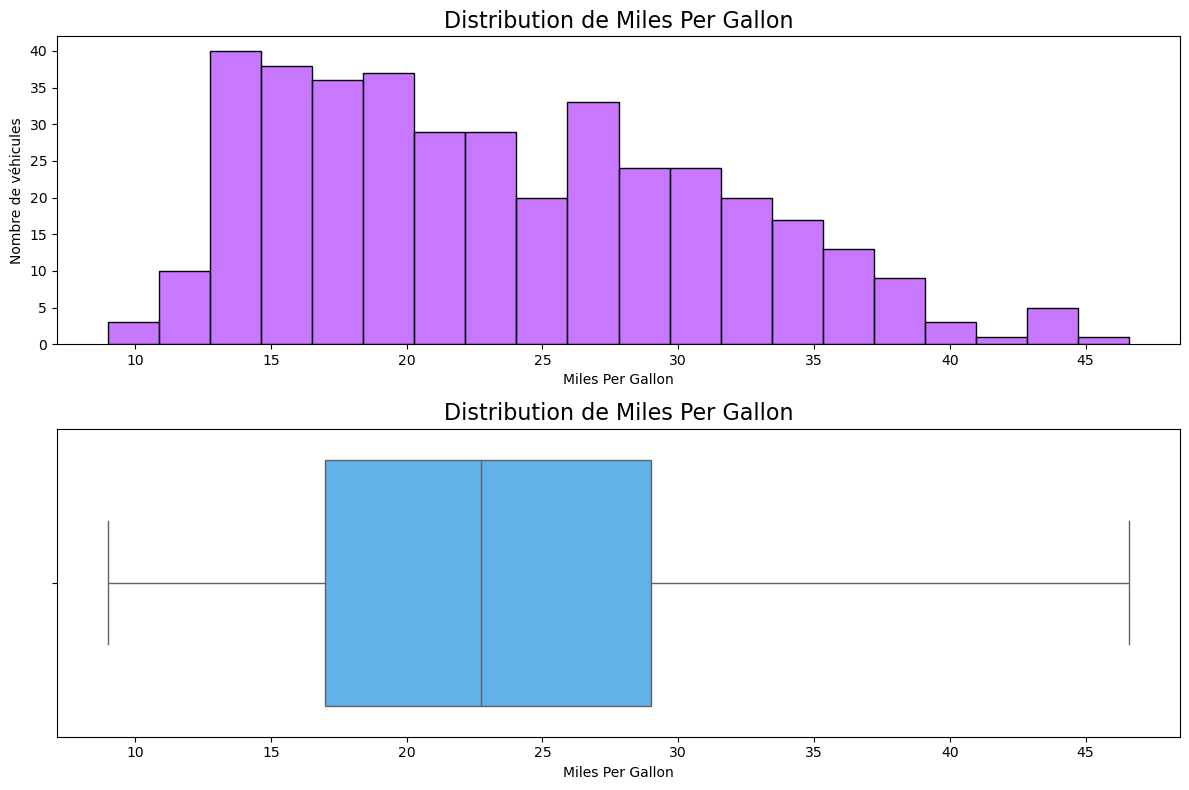

In [3]:
description = df["mpg"].describe()
display(description)

# Utilisation de subplots pour afficher les deux graphiques
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sns.histplot(df['mpg'], ax=ax1, bins=20, color='#B649FF')
ax1.set_title("Distribution de Miles Per Gallon",fontsize=16)
ax1.set_xlabel("Miles Per Gallon")
ax1.set_ylabel("Nombre de véhicules")


sns.boxplot(x=df['mpg'], ax=ax2, color='#49B6FF')
ax2.set_title("Distribution de Miles Per Gallon", fontsize=16)
ax2.set_xlabel("Miles Per Gallon")

plt.tight_layout()
plt.show()

### Observations sur la moyenne:
- La moyenne ici est de **23.445918** MPG, il sagit de la consommation moyenne en *miles per gallon* tous véhicules confondus, de 1970 à 1982, quelque soit leur pays d'origine, leur nombre de cylindres ou leur nom. 
- La médiane, qui coupe les effectifs en deux, à savoir que 50% des voitures consomment plus, et 50% des voitures consomment moins, est de **22.750000**.
- Ces deux valeurs étant assez proches, cela signifie que la moyenne n'est pas trop biaisée par les *outliers*.

## *3. Analyser la variable "origin"*

count     392
unique      3
top       usa
freq      245
Name: origin, dtype: object

C:\Users\Wolf\AppData\Local\Temp\ipykernel_21944\221581502.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='origin', data=df, palette='cool')


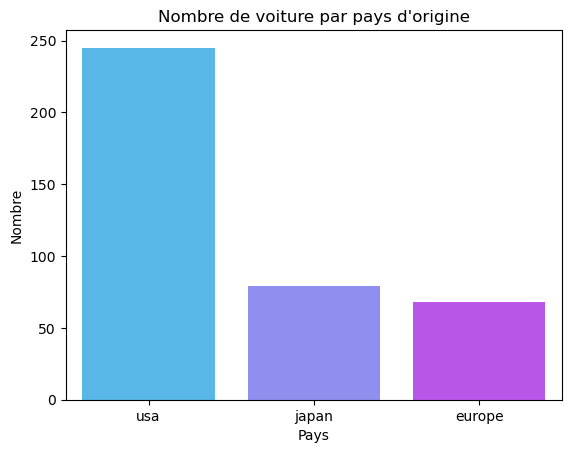

In [4]:
description = df["origin"].describe()
display(description)

sns.countplot(x='origin', data=df, palette='cool')
plt.title("Nombre de voiture par pays d'origine")
plt.xlabel("Pays")
plt.ylabel("Nombre")
plt.show()

## *4. Analyser la variable "cylinders"*

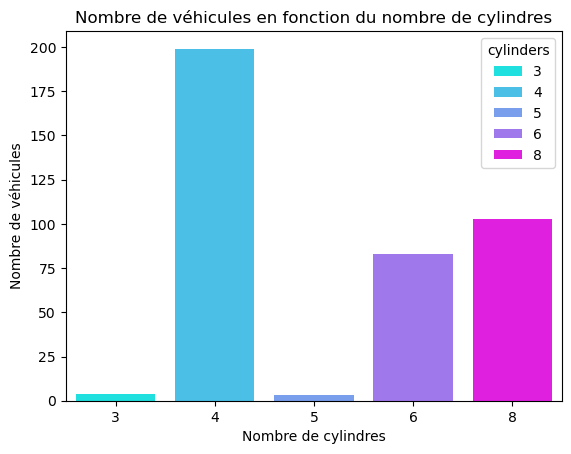

In [13]:
sns.countplot(data=df, x='cylinders',hue="cylinders", palette='cool')
plt.title("Nombre de véhicules en fonction du nombre de cylindres")
plt.xlabel("Nombre de cylindres")
plt.ylabel("Nombre de véhicules")
plt.show()

## *5. Observez l'évolution de la consommation des voitures (mpg) par rapport au nombre de chevaux (horsepower) et au poids par pays.*

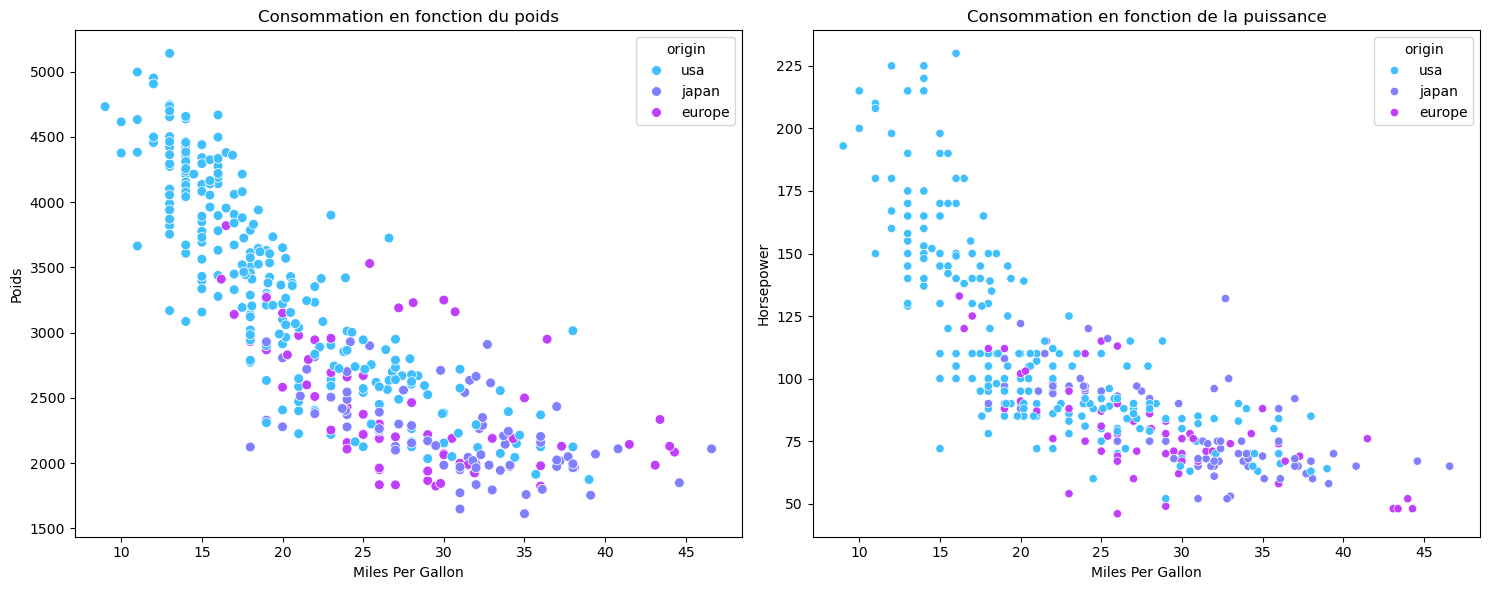

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df, x='mpg', y='weight', hue='origin', palette='cool', marker='o', s=50, ax=axes[0])
axes[0].set_title("Consommation en fonction du poids")
axes[0].set_xlabel("Miles Per Gallon")
axes[0].set_ylabel("Poids")

sns.scatterplot(x='mpg', y='horsepower', hue='origin', data=df, palette='cool', ax=axes[1])
axes[1].set_title("Consommation en fonction de la puissance")
axes[1].set_xlabel("Miles Per Gallon")
axes[1].set_ylabel("Horsepower")

plt.tight_layout()
plt.show()

### Observations:
- Nous constatons qu'à mesure que la puissance des véhicule diminue, elle peut parcourir de plus en plus de miles pour un gallon, sa consommation diminue donc. 
- Pareillement, plus elles sont légères moins elles consomment. 
- Les voitures les plus lourdes et les plus puissantes sont plus représentées aux usa qu'au Japon et en Europe. 

## *6. Différentes Analyses Temporelles.*

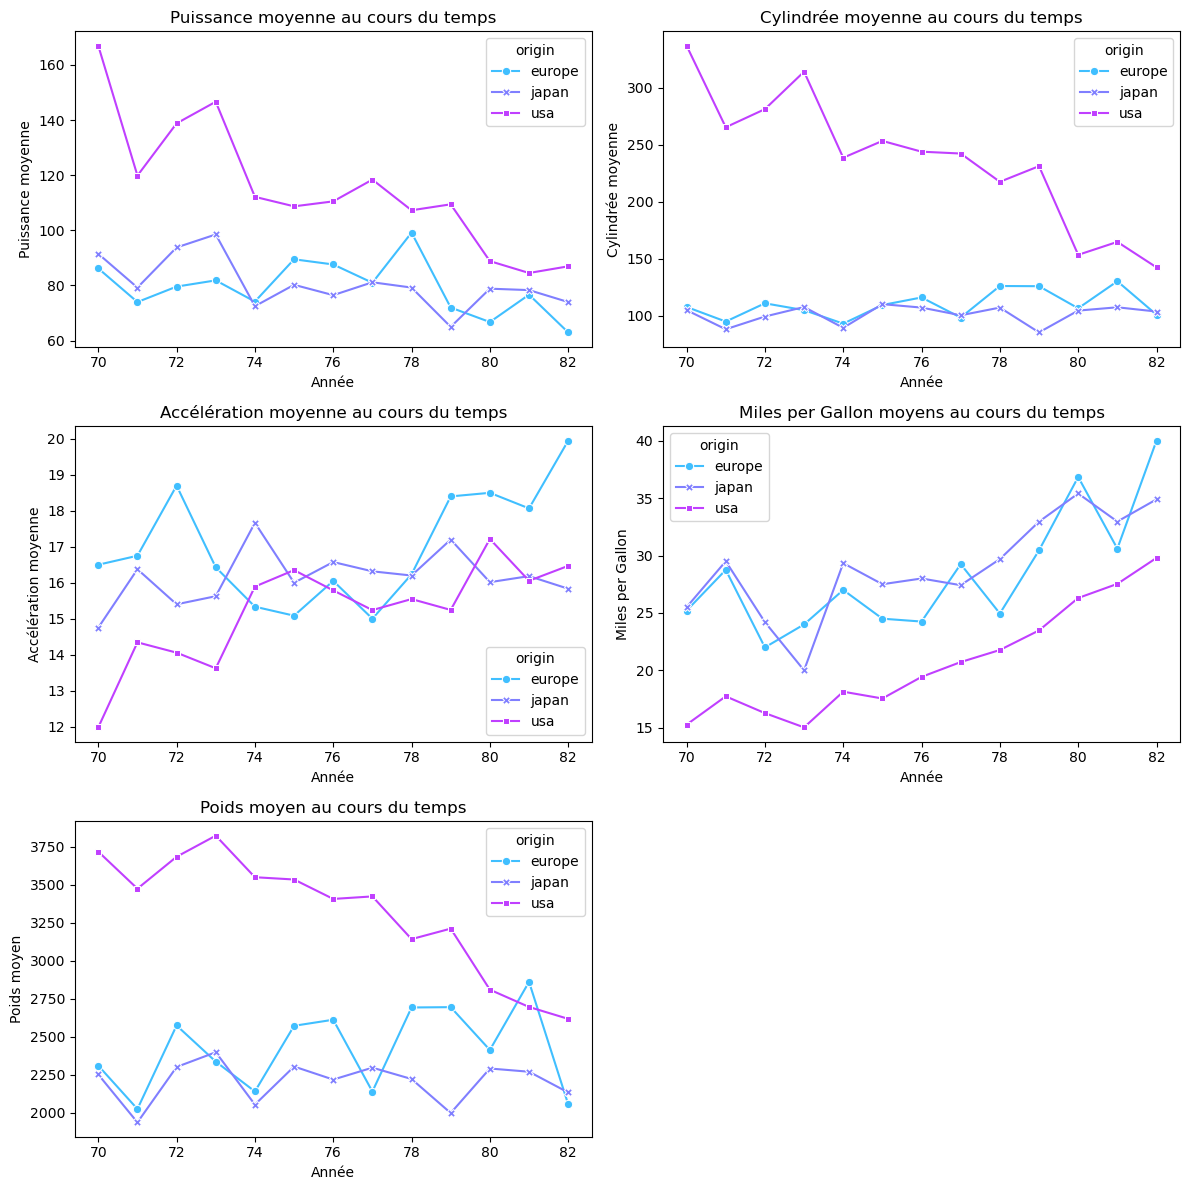

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plots_info = [
    {"column": "horsepower", "title": "Puissance moyenne au cours du temps", "ylabel": "Puissance moyenne"},
    {"column": "displacement", "title": "Cylindrée moyenne au cours du temps", "ylabel": "Cylindrée moyenne"},
    {"column": "acceleration", "title": "Accélération moyenne au cours du temps", "ylabel": "Accélération moyenne"},
    {"column": "mpg", "title": "Miles per Gallon moyens au cours du temps", "ylabel": "Miles per Gallon"},
    {"column": "weight", "title": "Poids moyen au cours du temps", "ylabel": "Poids moyen"}
]

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, plot_info in enumerate(plots_info):
    row, col = divmod(i, 2) 
    
    grouped_data = df.groupby(['model_year', 'origin'])[plot_info["column"]].mean().reset_index()
    sns.lineplot(
        data=grouped_data,
        x="model_year", y=plot_info["column"], style="origin",
        markers=True, dashes=False, hue="origin", palette='cool', ax=axes[row, col]
    )
    axes[row, col].set_title(plot_info["title"])
    axes[row, col].set_xlabel("Année")
    axes[row, col].set_ylabel(plot_info["ylabel"])

axes[2, 1].axis('off') 

plt.tight_layout()
plt.show()


### Observations: 
- La puissance et la cylindrée et le poids ont fortement baissé pour les USA, le Japon est assez stable, quant à l'Europe le poids a même eu tendance à augmenter. 
- Nous constatons que pour les Etats-Unis, le poids des voitures a considérablement baissé au fil des années, de 70 à 82.
- Dans tous les cas la consommation a dimunué au cours du temps, de manière assez linéaire pour les USA et très ératique pour l'Europe.
- L'accélération moyenne a quant à elle augmenté au fil des années, surtout en Europe depuis 77. Au Japon c'est resté relativement stable. 

## *7. Analysez la relation entre le nombre de cylindres et l'année du modèle.*

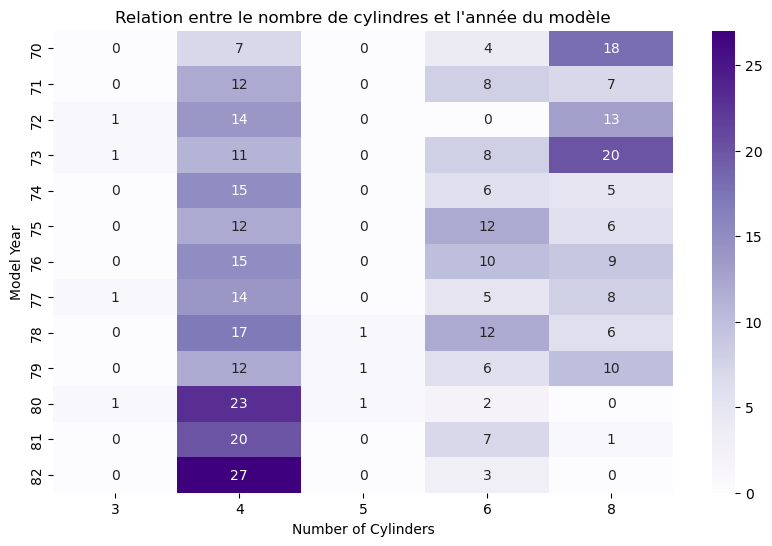

In [8]:
crosstab_data = pd.crosstab(df['model_year'], df['cylinders'])

plt.figure(figsize=(10,6))
sns.heatmap(crosstab_data, annot=True, cmap="Purples")

plt.title("Relation entre le nombre de cylindres et l'année du modèle")
plt.xlabel("Number of Cylinders")
plt.ylabel("Model Year")
plt.show()

### Observations:
- Nous pouvons constater que les 8 cylindres étaients plus fréquents dans les années 70 et ont diminués ensuite.
- Les 4 cylindres n'ont fait qu'augmenter au fil du temps.
- Les 6 cylindres quant à eux ont eu un peu le vent en poupe entre les années phares des 4 et 8 cylindres. 
- Les 3 et 5 cylindres ne sont pas très populaires. 

## *8. Analysez la relation entre le nombre de cylindres et l'origine.*

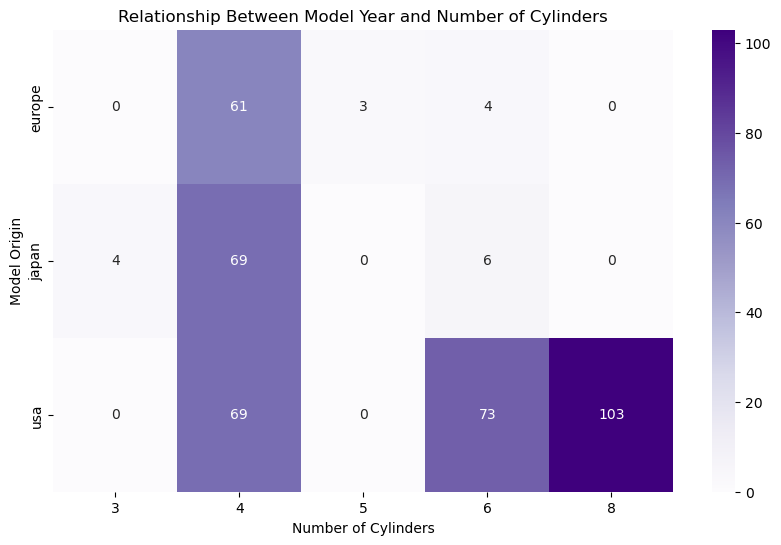

In [9]:
crosstab_data = pd.crosstab(df['origin'], df['cylinders'])

plt.figure(figsize=(10,6))
sns.heatmap(crosstab_data, annot=True, fmt="d", cmap="Purples")

plt.title("Relationship Between Model Year and Number of Cylinders")
plt.xlabel("Number of Cylinders")
plt.ylabel("Model Origin")
plt.show()

### Observations:
- Nous pouvons constater que les 8 cylindres sont exclusivement américaines.
- Les 6 cylindres en très grosse majorité aussi.
- Alors que les 4 cylindres sont répartis assez uniformément à travers les pays et seul le japon a un 3 cylindre et l'europe un 5 cylindres.
- Les japonais et les européens se concentrent en grosse majorité sur les 4 cylindres alors que les usa sont plus équléctiques, avec une majorité de 8 cylindres et les 6 et 4 cylindres aux coudes à coudes. 

## *9. Quelle est l'accélération moyenne des voitures des différents pays ?*

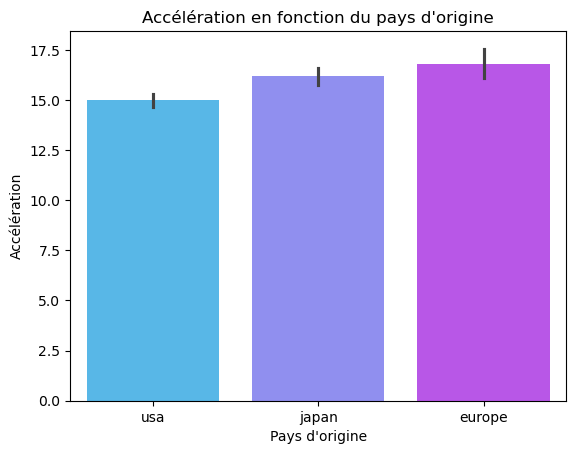

In [10]:
sns.barplot(x='origin', y='acceleration', hue='origin', data=df, palette='cool')
plt.title("Accélération en fonction du pays d'origine")
plt.xlabel("Pays d'origine")
plt.ylabel("Accélération")
plt.show()


### Observations:
- Les voitures des usa semblent avoir une meilleure accélération que celles du japon, celles-ci ayant une meilleur accélération que les voitures européennes, en dernière position donc, en moyenne.

## *10. Quelle est-elle pour les modèles de l'année 80 ?*

In [11]:
mean_acceleration = df[df['model_year'] == 80]['acceleration'].mean()

mini_table = pd.DataFrame({
    'Year': [1980],
    'Mean Acceleration': [mean_acceleration]
})

display(mini_table)

,Year,Mean Acceleration
0,1980,17.018519


### Observations:
- Les voitures en 1980 semblent avoir une accélération moyenne plus lente que la moyenne de l'accélération de 70 à 82 de chaque origin. En effet la moyenne la plus lente de 70 à 82 est 16.794118, alors que la moyenne toutes origines confondues pour 80 est de 117.018519. 


## *12. Analyse supplémentaire, la consommation moyenne en fonction du nombre de cylindres*

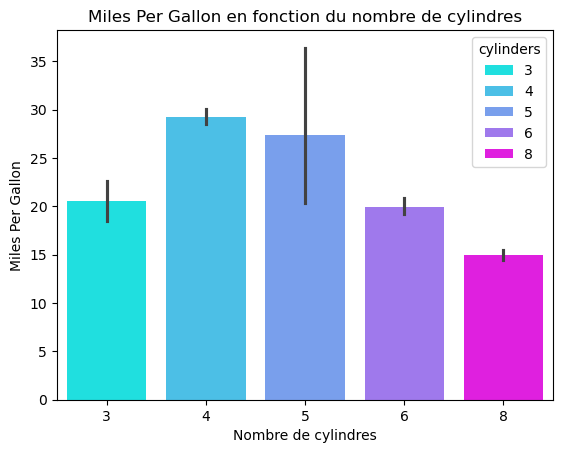

In [12]:
sns.barplot(x='cylinders', y='mpg', hue='cylinders', data=df, palette='cool')
plt.title("Miles Per Gallon en fonction du nombre de cylindres")
plt.xlabel("Nombre de cylindres")
plt.ylabel("Miles Per Gallon")
plt.show()

## *13. Au final Il semblerait qu'une tendance se dégage à travers le temps...*

Globalement les tendances qui se dégagent sur cette période là sont assez évidentes:
- La consommation semble diminuer au fil du temps donc les miles per gallon augmenter et ce dans tous les pays. Ceci pourrait être du à une baisse globale de la puissance et l'adoption des 4 cylindres pour les usa inasi qu'une baisse de poids importante.
    - Sur ce dataset on constate une diminution importante du poids des voitures américaines et de leur cylindrée au fil du temps alors qu'elles sont les plus nombreuses, pesant donc "plus lourds" sur les tendances générales observées.  
- Globalement on observe que plus une voiture est légère et peu puissante, moins elle consommera. 
- Bien que la puissance et la cylindrée qui sont très bien corrélés n'aient pas trop trop diminués au fil temps pour l'Europe et le Japon, ainsi que le poids (un peu mais moins que pour les usa), l'évolution du gain en consommation est assez proche, surtout depuis 76 ce qui peut laisser présupposer que l'efficience des moteurs au japon et en europe est meilleure qu'aux usa. 
